In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import re
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder, StandardScaler
import folium
from folium.plugins import HeatMap


# Cargar la base de datos
data = pd.read_csv('data/conjunto_de_datos_iter_08CSV20.csv')

data.head(15)

,NOM_ENT,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,Chihuahua,Chihuahua,1,Chihuahua,"106°04'34.704"" W","28°38'12.458"" N",1424.0,925762,474776,450986,...,281424,209425,140569,107030,63999,4721,7058,73517,1036,13
1,Chihuahua,Chihuahua,26,Francisco I. Madero (San Isidro Calabacillas),"106°18'03.973"" W","28°45'28.822"" N",1667.0,38,13,25,...,17,0,16,0,0,0,2,19,0,1
2,Chihuahua,Chihuahua,234,Abraham González,"105°43'35.052"" W","28°23'27.335"" N",1303.0,5,2,3,...,3,0,3,0,0,0,0,3,0,1
3,Chihuahua,Chihuahua,235,Rancho los Aguilares,"106°12'39.328"" W","28°08'58.961"" N",1472.0,94,51,43,...,27,7,22,0,1,2,2,24,0,1
4,Chihuahua,Chihuahua,236,El Alamillo,"106°11'34.182"" W","28°15'39.237"" N",1588.0,39,18,21,...,17,0,18,0,0,0,0,18,0,1
5,Chihuahua,Chihuahua,237,Rancho el Alamillo,"106°14'03.657"" W","28°08'29.068"" N",1508.0,118,66,52,...,29,1,22,1,0,3,5,33,2,1
6,Chihuahua,Chihuahua,240,Ejido Bella Vista,"106°25'01.916"" W","29°03'22.652"" N",1675.0,90,42,48,...,27,26,25,0,1,0,1,4,0,1
7,Chihuahua,Chihuahua,241,Ciénega de Ortíz (Boca de Ciénega),"106°11'40.847"" W","28°07'56.071"" N",1497.0,48,24,24,...,17,0,13,0,1,3,5,24,3,1
8,Chihuahua,Chihuahua,242,Carrizalillo,"106°01'33.156"" W","28°31'56.797"" N",1562.0,29,11,18,...,11,2,6,0,0,0,2,9,0,1
9,Chihuahua,Chihuahua,243,La Casita,"106°06'54.946"" W","28°13'02.762"" N",1633.0,318,168,150,...,75,2,76,0,0,5,17,108,2,2


In [29]:
# Saber que tipo de datos tenemos muestra todos
data.dtypes

NOM_ENT        object
NOM_MUN        object
LOC             int64
NOM_LOC        object
LONGITUD       object
                ...  
VPH_SINRTV     object
VPH_SINLTC     object
VPH_SINCINT    object
VPH_SINTIC     object
TAMLOC         object
Length: 284, dtype: object

In [30]:
# Qué tipo de datos tenemos en las columnas LONGITUD y LATITUD Y ALTITUD
data[['LONGITUD', 'LATITUD', 'ALTITUD']].dtypes

LONGITUD     object
LATITUD      object
ALTITUD     float64
dtype: object

In [31]:
data.head()   

,NOM_ENT,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,Chihuahua,Chihuahua,1,Chihuahua,"106°04'34.704"" W","28°38'12.458"" N",1424.0,925762,474776,450986,...,281424,209425,140569,107030,63999,4721,7058,73517,1036,13
1,Chihuahua,Chihuahua,26,Francisco I. Madero (San Isidro Calabacillas),"106°18'03.973"" W","28°45'28.822"" N",1667.0,38,13,25,...,17,0,16,0,0,0,2,19,0,1
2,Chihuahua,Chihuahua,234,Abraham González,"105°43'35.052"" W","28°23'27.335"" N",1303.0,5,2,3,...,3,0,3,0,0,0,0,3,0,1
3,Chihuahua,Chihuahua,235,Rancho los Aguilares,"106°12'39.328"" W","28°08'58.961"" N",1472.0,94,51,43,...,27,7,22,0,1,2,2,24,0,1
4,Chihuahua,Chihuahua,236,El Alamillo,"106°11'34.182"" W","28°15'39.237"" N",1588.0,39,18,21,...,17,0,18,0,0,0,0,18,0,1


In [32]:
# Quiero saber el nombre de las columnas
data.columns

Index(['NOM_ENT', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD', 'LATITUD',
       'ALTITUD', 'POBTOT', 'POBFEM', 'POBMAS',
       ...
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ',
       'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCINT', 'VPH_SINTIC', 'TAMLOC'],
      dtype='object', length=284)

In [33]:
# 2. Función para convertir coordenadas DMS a decimales

def dms_to_decimal(coord):
    match = re.match(r"(\d+)°(\d+)'([\d\.]+)\" ([NSEW])", str(coord))
    if not match:
        return None
    
    grados = int(match.group(1))
    minutos = int(match.group(2))
    segundos = float(match.group(3))
    direccion = match.group(4)
    
    decimal = grados + minutos/60 + segundos/3600
    
    if direccion in ["S", "W"]:
        decimal = -decimal
    
    return decimal

In [34]:
data.head()

,NOM_ENT,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,Chihuahua,Chihuahua,1,Chihuahua,"106°04'34.704"" W","28°38'12.458"" N",1424.0,925762,474776,450986,...,281424,209425,140569,107030,63999,4721,7058,73517,1036,13
1,Chihuahua,Chihuahua,26,Francisco I. Madero (San Isidro Calabacillas),"106°18'03.973"" W","28°45'28.822"" N",1667.0,38,13,25,...,17,0,16,0,0,0,2,19,0,1
2,Chihuahua,Chihuahua,234,Abraham González,"105°43'35.052"" W","28°23'27.335"" N",1303.0,5,2,3,...,3,0,3,0,0,0,0,3,0,1
3,Chihuahua,Chihuahua,235,Rancho los Aguilares,"106°12'39.328"" W","28°08'58.961"" N",1472.0,94,51,43,...,27,7,22,0,1,2,2,24,0,1
4,Chihuahua,Chihuahua,236,El Alamillo,"106°11'34.182"" W","28°15'39.237"" N",1588.0,39,18,21,...,17,0,18,0,0,0,0,18,0,1


In [35]:
# Manejar valores no convertibles
def safe_dms_to_decimal(dms_str):
    try:
        return dms_to_decimal(dms_str)
    except Exception:
        return None

data["LAT_DECIMAL"] = data["LATITUD"].apply(safe_dms_to_decimal)
data["LON_DECIMAL"] = data["LONGITUD"].apply(safe_dms_to_decimal)

# Filtrar columnas necesarias
data = data[["LAT_DECIMAL", "LON_DECIMAL", "ALTITUD", "VIVTOT", "VIVPAR_HAB", "VIVPAR_DES"]].dropna()

print("Vista previa de la base del censo:")
data.head()

Vista previa de la base del censo:


,LAT_DECIMAL,LON_DECIMAL,ALTITUD,VIVTOT,VIVPAR_HAB,VIVPAR_DES
0,28.636794,-106.076307,1424.0,343627,278936,36421
1,28.758006,-106.301104,1667.0,59,19,4
2,28.390926,-105.726403,1303.0,7,3,3
3,28.149711,-106.210924,1472.0,47,32,7
4,28.260899,-106.192828,1588.0,32,18,7


In [36]:
# Leer base de datos de robos (FICOSEC)

df = pd.read_excel("data/IPH_robos_ene-ago-2025_tecmty.xlsx")

# Asegurar que las columnas sean numéricas
df["LATITUD"] = pd.to_numeric(df["LATITUD"], errors="coerce")
df["LONGITUD"] = pd.to_numeric(df["LONGITUD"], errors="coerce")
df = df.dropna(subset=["LATITUD", "LONGITUD"])

# Renombrar columnas a formato decimal
df = df.rename(columns={"LATITUD": "LAT_DECIMAL", "LONGITUD": "LON_DECIMAL"})

print("Vista previa de la base de robos:")
df.head()

Vista previa de la base de robos:


,FOLIO,FECHA,HORA,MINUTO,TIPO,VOLENCIA,LAT_DECIMAL,LON_DECIMAL,DISTRITO,CUADRANTE
0,759476,2025-01-01,5,11,ROBO A NEGOCIO,SI,28.600113,-106.061258,Zapata,76
1,759978,2025-01-01,5,25,ROBO A NEGOCIO,SI,28.609652,-106.065990,Zapata,75
2,760050,2025-01-01,6,31,ROBO DE VEHICULO,NO,28.639322,-106.039862,Morelos,51
3,760404,2025-01-01,11,50,ROBO A CASA HABITACION,NO,28.643275,-106.030795,Morelos,51
4,769412,2025-01-01,12,0,ROBO A NEGOCIO,NO,28.693501,-106.115590,Villa,17


In [40]:
# 5. Cruzar con k-NN (vincular viviendas a cada robo)
nn = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(data[["LAT_DECIMAL", "LON_DECIMAL"]])
distancias, indices = nn.kneighbors(df[["LAT_DECIMAL", "LON_DECIMAL"]])

# Asignar VIVTOT, VIVPAR_HAB y VIVPAR_DES a cada registro de robo
df["VIVTOT"] = data.iloc[indices.flatten()]["VIVTOT"].values
df["VIVPAR_HAB"] = data.iloc[indices.flatten()]["VIVPAR_HAB"].values
df["VIVPAR_DES"] = data.iloc[indices.flatten()]["VIVPAR_DES"].values

print("Vista previa de la base de robos enriquecida:")
df.head(10)

Vista previa de la base de robos enriquecida:


,FOLIO,FECHA,HORA,MINUTO,TIPO,VOLENCIA,LAT_DECIMAL,LON_DECIMAL,DISTRITO,CUADRANTE,VIVTOT,VIVPAR_HAB,VIVPAR_DES
0,759476,2025-01-01,5,11,ROBO A NEGOCIO,SI,28.600113,-106.061258,Zapata,76,1,*,*
1,759978,2025-01-01,5,25,ROBO A NEGOCIO,SI,28.609652,-106.065990,Zapata,75,343627,278936,36421
2,760050,2025-01-01,6,31,ROBO DE VEHICULO,NO,28.639322,-106.039862,Morelos,51,343627,278936,36421
3,760404,2025-01-01,11,50,ROBO A CASA HABITACION,NO,28.643275,-106.030795,Morelos,51,343627,278936,36421
4,769412,2025-01-01,12,0,ROBO A NEGOCIO,NO,28.693501,-106.115590,Villa,17,1,*,*
5,760412,2025-01-01,12,6,ROBO A NEGOCIO,NO,28.693475,-106.115476,Villa,17,1,*,*
6,760559,2025-01-01,13,47,ROBO DE VEHICULO,NO,28.771511,-106.161973,Colón,3,150,93,20
7,761131,2025-01-01,19,10,ROBO A CASA HABITACION,NO,28.662759,-105.948717,Morelos,48,1,*,*
8,762249,2025-01-02,9,10,ROBO DE VEHICULO,NO,28.587403,-106.040247,Morelos,59,1,*,*
9,762311,2025-01-02,9,42,ROBO A NEGOCIO,NO,28.631906,-106.121163,Diana,32,3,*,*


In [42]:
# 6. Clustering: VIVTOT + VIVPAR_HAB + VIVPAR_DES
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Convertir columnas a numéricas (los errores se vuelven NaN)
for col in ["VIVTOT", "VIVPAR_HAB", "VIVPAR_DES"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Eliminar filas con datos faltantes en las variables de interés
df_cluster = df.dropna(subset=["VIVTOT", "VIVPAR_HAB", "VIVPAR_DES"]).copy()

# Escalar variables
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster[["VIVTOT", "VIVPAR_HAB", "VIVPAR_DES"]])

# Aplicar KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster["Cluster"] = kmeans.fit_predict(X)

# Distribución de registros por clúster
print("Distribución de registros por clúster:")
print(df_cluster["Cluster"].value_counts())

df_cluster.head()

Distribución de registros por clúster:
Cluster
1    346
0    158
3     46
2     31
Name: count, dtype: int64


,FOLIO,FECHA,HORA,MINUTO,TIPO,VOLENCIA,LAT_DECIMAL,LON_DECIMAL,DISTRITO,CUADRANTE,VIVTOT,VIVPAR_HAB,VIVPAR_DES,Cluster
1,759978,2025-01-01,5,25,ROBO A NEGOCIO,SI,28.609652,-106.065990,Zapata,75,343627,278936.0,36421.0,1
2,760050,2025-01-01,6,31,ROBO DE VEHICULO,NO,28.639322,-106.039862,Morelos,51,343627,278936.0,36421.0,1
3,760404,2025-01-01,11,50,ROBO A CASA HABITACION,NO,28.643275,-106.030795,Morelos,51,343627,278936.0,36421.0,1
6,760559,2025-01-01,13,47,ROBO DE VEHICULO,NO,28.771511,-106.161973,Colón,3,150,93.0,20.0,2
10,762482,2025-01-02,11,35,ROBO DE VEHICULO,NO,28.634679,-106.076379,Ángel,38,343627,278936.0,36421.0,1


In [45]:
# 9. Puntos de color por clúster (con tus variables)
colores = ['orange', 'cyan', 'magenta', 'lime']  # Nuevos colores para los clústeres

# Crear un nuevo mapa centrado en Chihuahua
m = folium.Map(location=[28.63299, -106.0691], zoom_start=12)

# Muestra máx 300 puntos aleatorios del DataFrame clusterizado
for _, row in df_cluster.sample(min(300, len(df_cluster)), random_state=42).iterrows():
    folium.CircleMarker(
        location=[row["LAT_DECIMAL"], row["LON_DECIMAL"]],
        radius=3,
        color=colores[int(row["Cluster"])],
        fill=True,
        fill_opacity=0.7,
        popup=(
            f"<b>VIVTOT:</b> {row['VIVTOT']}<br>"
            f"<b>VIVPAR_HAB:</b> {row['VIVPAR_HAB']}<br>"
            f"<b>VIVPAR_DES:</b> {row['VIVPAR_DES']}<br>"
            f"<b>Cluster:</b> {row['Cluster']}"
        )
    ).add_to(m)

# 10. Agregar leyenda interpretativa personalizada
legend_html = """
<div style=\"
    position: fixed; 
    bottom: 30px; left: 30px; width: 260px; height: 150px; 
    border:2px solid grey; z-index:9999; font-size:14px;
    background-color:white; padding:10px;\">
<b>📊 Leyenda de Clústeres</b><br>
<span style='color:orange;'>●</span> Cluster 0 – Viviendas totales bajas<br>
<span style='color:cyan;'>●</span> Cluster 1 – Viviendas habitadas predominantes<br>
<span style='color:magenta;'>●</span> Cluster 2 – Viviendas deshabitadas predominantes<br>
<span style='color:lime;'>●</span> Cluster 3 – Mixto / transición<br>
<hr>
🔥 Mapa de calor: mayor densidad de viviendas deshabitadas
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

m

In [44]:
# Mapa de calor ponderado por viviendas deshabitadas
from folium.plugins import HeatMap

# Crear un DataFrame para el mapa de calor
heat_data = df_cluster[["LAT_DECIMAL", "LON_DECIMAL", "VIVPAR_DES"]].dropna()

# Crear el mapa de calor
HeatMap(data=heat_data, radius=15).add_to(mapa)

mapa

Centroides de cada clúster:


,VIVTOT,VIVPAR_HAB,VIVPAR_DES
Cluster,,,
0,7.651899,6.78481,0.240506
1,343627.000000,278936.00000,36421.000000
2,149.193548,92.00000,20.451613
3,30.065217,18.23913,7.804348


/tmp/ipykernel_9006/2011534991.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=var, data=df_cluster, palette="Set2")


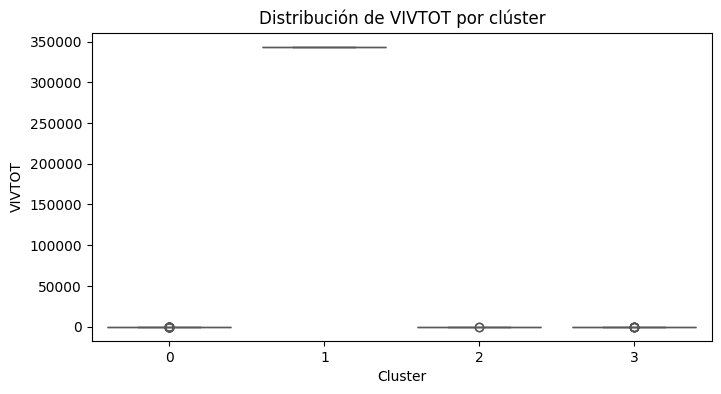

/tmp/ipykernel_9006/2011534991.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=var, data=df_cluster, palette="Set2")


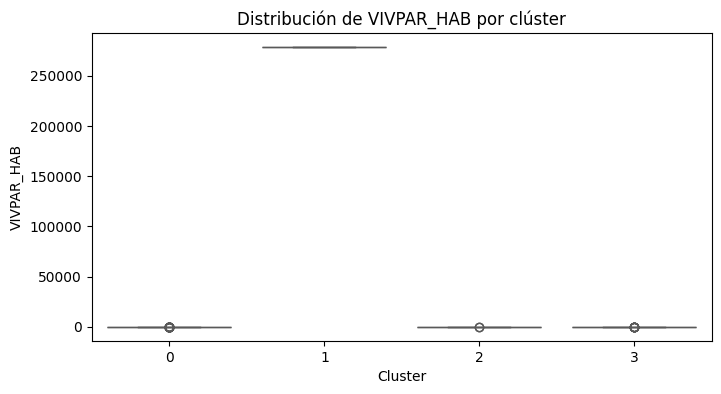

/tmp/ipykernel_9006/2011534991.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=var, data=df_cluster, palette="Set2")


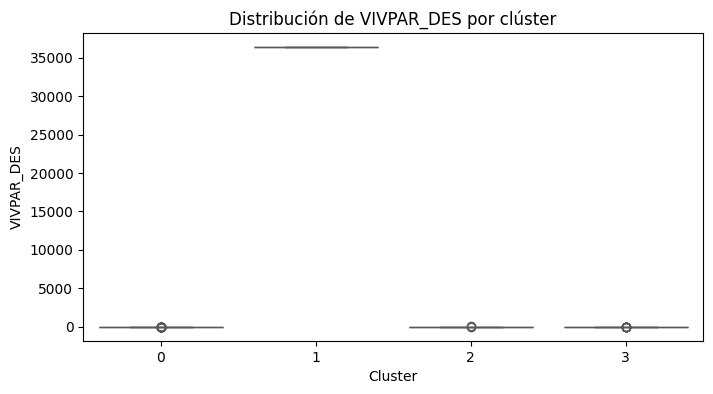

In [46]:
# Análisis de centroides de clústeres (valores promedio por grupo)
centroides = df_cluster.groupby("Cluster")[["VIVTOT", "VIVPAR_HAB", "VIVPAR_DES"]].mean()
print("Centroides de cada clúster:")
display(centroides)

# Visualización de la distribución de variables por clúster
import matplotlib.pyplot as plt
import seaborn as sns

variables = ["VIVTOT", "VIVPAR_HAB", "VIVPAR_DES"]
for var in variables:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="Cluster", y=var, data=df_cluster, palette="Set2")
    plt.title(f"Distribución de {var} por clúster")
    plt.show()